In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

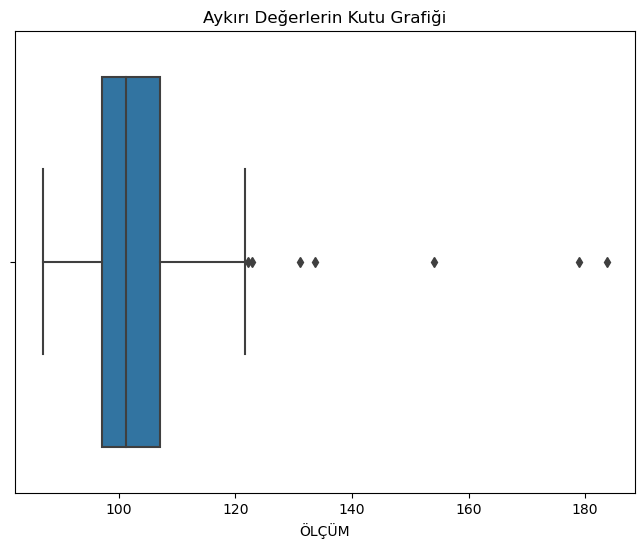

In [6]:
df = pd.read_excel("TemizlenmisTerminalDatasi/foms17_motorin_300ppb.xlsx")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["ÖLÇÜM"])
plt.title("Aykırı Değerlerin Kutu Grafiği")
plt.show()
#df['sonuc'] = 100



In [9]:
df.head()

,ID,KULLANICI,EKİP,ÖLÇÜM NEDENİ,İSTASYON,YAKIT TÜRÜ,BATTERY,TARİH,SAAT,CH1,...,CH3,CH4,CT,ST,ÖLÇÜM,ALAN,PLAKA,FATURA,KOL,NOT
0,143-158-132-GL-1-17_1006,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,195.84,2022-05-03,09:34:00,873276,...,549055,506469,22.5,25.9,92.9,NaN,NaN,NaN,NaN,korfez katık tank 1
1,143-158-132-GL-1-17_1007,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,8.40,2022-05-03,11:01:00,877219,...,554079,511662,22.9,26.5,94.3,NaN,NaN,NaN,NaN,k.kale katık
2,143-158-132-GL-1-17_1008,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel UlltraForce,8.42,2022-05-03,11:02:00,881457,...,572203,533592,23.0,26.6,97.0,NaN,NaN,NaN,NaN,k.kale katık
3,143-158-132-GL-1-17_1011,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,8.41,2022-05-03,12:52:00,887130,...,581438,545903,24.0,27.5,106.0,NaN,NaN,NaN,NaN,korfez katık tank 6
4,143-158-132-GL-1-17_1014,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel UlltraForce,8.46,2022-05-04,10:20:00,888305,...,591191,561454,24.3,28.1,106.0,NaN,NaN,NaN,NaN,aliağa katık göz 3


In [12]:
df2 = pd.read_excel("TemizlenmisTerminalDatasi/foms17_motorin_0ppb.xlsx")
df2["sonuc"] = 0
df2.head()

,Background,CH1,CH2,CH3,CH4,Fuel Temp.,Sens.Temp.,Unnamed: 7,sonuc
0,0 ppb 303 VAS Mersin 030721,118242,38523,54114,62621,NaN,NaN,NaN,0
1,0 ppb 303 VAS Mersin 030721,118932,38749,54433,63077,NaN,NaN,NaN,0
2,0 ppb 303 VAS Mersin 030721,119250,38846,54496,63214,NaN,NaN,NaN,0
3,Marmara 905 BG 030821 Motorin,379160,73993,149681,130517,NaN,NaN,NaN,0
4,Marmara 905 BG 030821 Motorin,382601,74525,150956,131580,NaN,NaN,NaN,0


In [13]:
df["sonuc"] = 100
df.head()

,ID,KULLANICI,EKİP,ÖLÇÜM NEDENİ,İSTASYON,YAKIT TÜRÜ,BATTERY,TARİH,SAAT,CH1,...,CH4,CT,ST,ÖLÇÜM,ALAN,PLAKA,FATURA,KOL,NOT,sonuc
0,143-158-132-GL-1-17_1006,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,195.84,2022-05-03,09:34:00,873276,...,506469,22.5,25.9,92.9,NaN,NaN,NaN,NaN,korfez katık tank 1,100
1,143-158-132-GL-1-17_1007,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,8.40,2022-05-03,11:01:00,877219,...,511662,22.9,26.5,94.3,NaN,NaN,NaN,NaN,k.kale katık,100
2,143-158-132-GL-1-17_1008,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel UlltraForce,8.42,2022-05-03,11:02:00,881457,...,533592,23.0,26.6,97.0,NaN,NaN,NaN,NaN,k.kale katık,100
3,143-158-132-GL-1-17_1011,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel EcoForce,8.41,2022-05-03,12:52:00,887130,...,545903,24.0,27.5,106.0,NaN,NaN,NaN,NaN,korfez katık tank 6,100
4,143-158-132-GL-1-17_1014,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Marker Test,NaN,Diesel UlltraForce,8.46,2022-05-04,10:20:00,888305,...,561454,24.3,28.1,106.0,NaN,NaN,NaN,NaN,aliağa katık göz 3,100


In [15]:
df = df[["CH1","CH2","CH3","CH4","sonuc"]]
df2 = df2[["CH1","CH2","CH3","CH4","sonuc"]]
df.head()

,CH1,CH2,CH3,CH4,sonuc
0,873276,296870,549055,506469,100
1,877219,299289,554079,511662,100
2,881457,312644,572203,533592,100
3,887130,320032,581438,545903,100
4,888305,329687,591191,561454,100


In [21]:
df2.head()
df2.shape
df.shape

(410, 5)

In [24]:
result_horizontal = pd.concat([df, df2], ignore_index=True)
result_horizontal.tail()

,CH1,CH2,CH3,CH4,sonuc
457,439463,90013,200863,163212,0
458,370629,72862,163663,133267,0
459,297949,74194,142455,129485,0
460,297976,74305,142460,129528,0
461,320274,77274,150431,135585,0


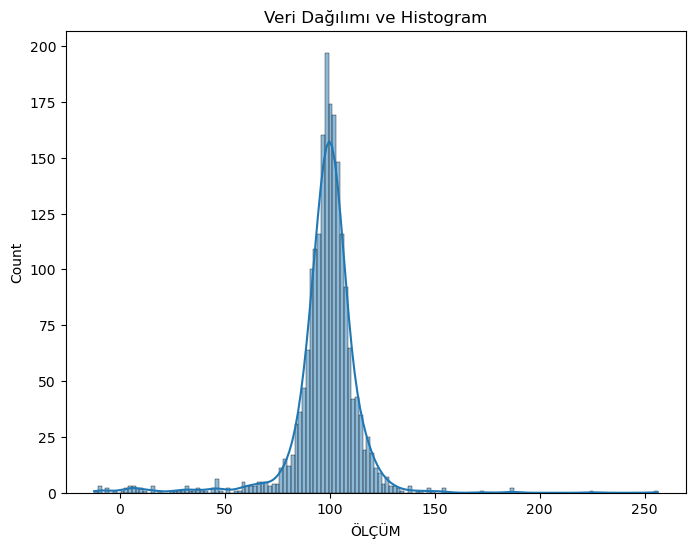

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(df["ÖLÇÜM"], kde=True)
plt.title("Veri Dağılımı ve Histogram")
plt.show()

In [26]:
train_df=result_horizontal

In [4]:
z_scores = (train_df["sonuc"] - train_df["sonuc"].mean()) / df["ÖLÇÜM"].std()
threshold = 3  # Z-Skoru eşiği
outliers = df["ÖLÇÜM"][abs(z_scores) > threshold]
outliers_indices = np.where(abs(z_scores) > threshold)[0]

In [5]:
print("Aykırı Değerler:")
print(outliers)



Aykırı Değerler:
0        -9.5
1       -12.3
2        -8.7
3        -6.0
4        -6.0
5       -10.1
6         0.6
7        -1.7
8         5.9
9        38.0
10        5.5
11       15.7
12        5.0
18       40.5
21       39.8
29       46.1
37       45.8
49        9.7
131      44.8
152       6.4
166      15.3
175      18.8
202      45.9
228      31.0
234      25.7
238      32.8
261      24.5
329       6.5
561       8.3
786       3.8
801       2.7
806      11.1
815       4.2
822     172.9
848       8.3
862     153.7
880      11.6
935     187.4
936     186.1
962      15.0
1093     31.8
1179    225.4
1307    154.1
1326     43.7
1381     28.6
1576     36.7
1583     35.2
1611     32.6
1676     29.3
1825    256.2
Name: ÖLÇÜM, dtype: float64


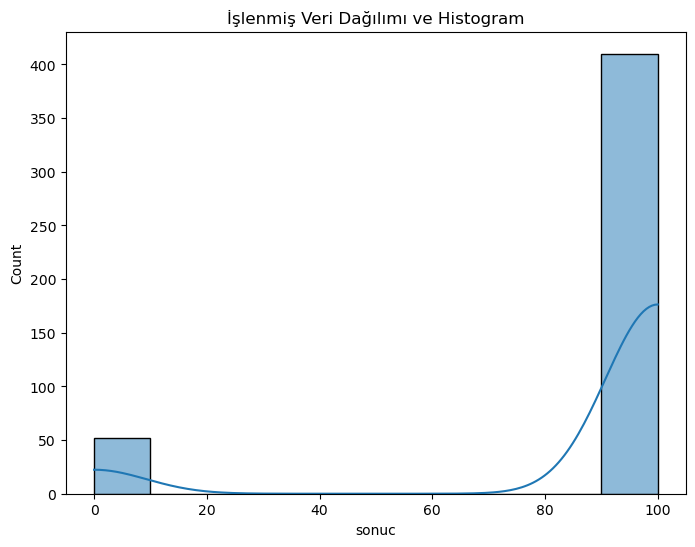

In [29]:
# Aykırı değerleri işleme: Çıkartma
#cleaned_df = df.drop(outliers_indices)

# Histogram ile işlenmiş veri setini görselleştirelim
plt.figure(figsize=(8, 6))
sns.histplot(train_df["sonuc"], kde=True)
plt.title('İşlenmiş Veri Dağılımı ve Histogram')
plt.show()

In [7]:
cleaned_df.to_excel("temizYıllıkVeri.xlsx")

In [8]:
cleaned_df.count()

ID              1957
KULLANICI       1957
EKİP            1957
ÖLÇÜM NEDENİ    1957
İSTASYON        1943
YAKIT TÜRÜ      1957
BATTERY         1957
TARİH           1957
SAAT            1957
CH1             1957
CH2             1957
CH3             1957
CH4             1957
CT              1957
ST              1957
ÖLÇÜM           1957
ALAN            1454
PLAKA           1605
FATURA          1457
KOL             1454
NOT                7
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
cleaned_df = pd.read_excel("TemizlenmisTerminalDatasi/temizYıllıkVeri.xlsx")

test_df = pd.read_excel(("TemizlenmisTerminalDatasi/foms17_motorin_testdata.xlsx"))
test_df.head()

,ID,KULLANICI,EKİP,ÖLÇÜM NEDENİ,İSTASYON,YAKIT TÜRÜ,BATTERY,TARİH,SAAT,CH1,...,CH3,CH4,CT,ST,ÖLÇÜM,ALAN,PLAKA,FATURA,KOL,NOT
0,143-158-132-GL-1-17_1044,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,HURİYE GÖK,Diesel EcoForce,8.39,2022-05-09,15:39:00,864793,...,594248,572415,21.9,25.7,118.1,E.UYAR,16 H 1282,05/03/2022,503.0,NaN
1,143-158-132-GL-1-17_1045,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,HURİYE GÖK,Diesel UlltraForce,8.39,2022-05-09,15:41:00,864286,...,593942,571911,21.9,25.9,112.6,E.UYAR,16 H 1282,05/03/2022,503.0,NaN
2,143-158-132-GL-1-17_1057,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,AKİF YILMAZ AKARYAKIT VE DİNLENMETESİSLERİ TİC...,Diesel UlltraForce,8.41,2022-05-09,15:58:00,931970,...,606086,568576,21.8,26.7,104.4,E.KOSE,34 DDC 467,05/06/2022,303.0,NaN
3,143-158-132-GL-1-17_1058,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,AKİF YILMAZ AKARYAKIT VE DİNLENMETESİSLERİ TİC...,Diesel EcoForce,8.39,2022-05-09,15:59:00,933196,...,605288,567536,21.8,26.6,109.2,E.KOSE,34 BKU 404,05/06/2022,301.0,NaN
4,143-158-132-GL-1-17_1056,ayla.unal@opet.com.tr,TDE Kocaeli,Terminal Ölçümü / Tanker Kontrolü,AKİF YILMAZ AKARYAKIT VE DİNLENMETESİSLERİ TİC...,Diesel UlltraForce,8.40,2022-05-09,15:57:00,922866,...,603228,567022,21.8,26.5,104.8,E.KOSE,34 BKU 404,05/06/2022,303.0,NaN


In [37]:
test_df = test_df[['CH1', 'CH2', 'CH3', 'CH4',"ÖLÇÜM"]]
X = test_df[['CH1', 'CH2', 'CH3', 'CH4']]
y = test_df['ÖLÇÜM']

X_test = X
y_test = y

X = train_df[['CH1', 'CH2', 'CH3', 'CH4']]
y = train_df['sonuc']


X_train = X
y_train =y
X_train.shape


(462, 4)

In [10]:
deneme_df = pd.read_excel("TemizlenmisTerminalDatasi/foms17_motorin_300ppb.xlsx")
deneme_df.head()
X_test = deneme_df[['CH1', 'CH2', 'CH3', 'CH4', 'CT', 'ST']]

y_test = deneme_df["ÖLÇÜM"]
y_test

0       92.9
1       94.3
2       97.0
3      106.0
4      106.0
       ...  
405    107.5
406    106.6
407     97.6
408     97.8
409     92.1
Name: ÖLÇÜM, Length: 410, dtype: float64

In [11]:
z_scores = (deneme_df["ÖLÇÜM"] - deneme_df["ÖLÇÜM"].mean()) / deneme_df["ÖLÇÜM"].std()
threshold = 2  # Z-Skoru eşiği
outliers = deneme_df["ÖLÇÜM"][abs(z_scores) > threshold]
outliers_indices = np.where(abs(z_scores) > threshold)[0]
# Aykırı değerleri işleme: Çıkartma
temiz_deneme_df = deneme_df.drop(outliers_indices)

In [12]:
outliers

109    121.7
166    131.0
176    183.7
223    121.6
243    133.6
344    122.8
394    122.2
401    179.0
402    154.0
Name: ÖLÇÜM, dtype: float64

In [13]:
X_test = tes[['CH1', 'CH2', 'CH3', 'CH4']]

y_test = temiz_deneme_df["ÖLÇÜM"]
y_test

0       92.9
1       94.3
2       97.0
3      106.0
4      106.0
       ...  
405    107.5
406    106.6
407     97.6
408     97.8
409     92.1
Name: ÖLÇÜM, Length: 401, dtype: float64

In [38]:
test_df["ÖLÇÜM"].values

array([118.1, 112.6, 104.4, ...,  84.7,  84.2,  38. ])

In [39]:
print(y_test)

0       118.1
1       112.6
2       104.4
3       109.2
4       104.8
        ...  
1426    101.7
1427     92.8
1428     84.7
1429     84.2
1430     38.0
Name: ÖLÇÜM, Length: 1431, dtype: float64


In [53]:
svr_model = SVR(kernel='poly', degree=2)

In [54]:
svr_model.fit(X_train, y_train)


SVR(degree=2, kernel='poly')

In [55]:
#a = {1:131194,2:143404,3:203105,4:236266,5:24.4,6:29.2}
predictions = svr_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print(predictions)

RMSE: 7.847828915718661
[105.6190057  105.55373126  96.27751314 ...  85.81661514  85.60319946
  68.12087036]


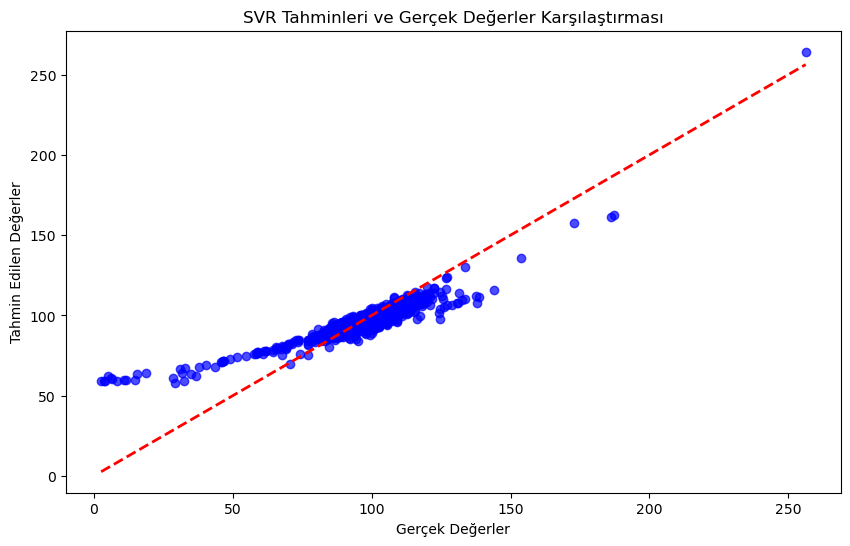

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('SVR Tahminleri ve Gerçek Değerler Karşılaştırması')
plt.show()